# Matplotlib illustrations

### Delta pulse

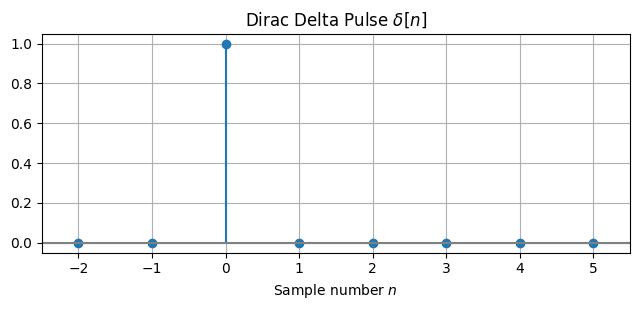

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# n from -2 to 5; δ[n] is 1 at n=0 and 0 elsewhere
n = np.arange(-2, 6)
delta = (n == 0).astype(float)

fig, ax = plt.subplots(figsize=(6.5, 3.2))
dirac_stem = ax.stem(n, delta, basefmt="grey")  # stems + 
dirac_stem.baseline.set_xdata([-3, 6])
ax.set_xticks(n)
ax.set_xlim(-2.5, 5.5)
ax.set_ylim(-0.05, 1.05)
ax.grid(True)

ax.set_title(r"Dirac Delta Pulse $\delta[n]$")
ax.set_xlabel(r"Sample number $n$")

plt.tight_layout()


plt.savefig("Fig1_dn.svg")  # optional: save the figure


### Ideal filter frequency response


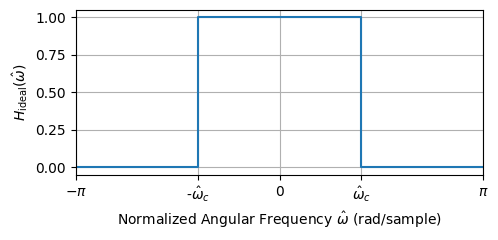

In [34]:
plt.rcParams["figure.figsize"] = [5.00, 2.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

f_c = .2
f = [-.5, -f_c, -f_c, f_c, f_c, .5]
H = [0, 0, 1, 1, 0, 0]

fig, ax = plt.subplots(1,1)
ax.plot(f, H)
ax.set_xticks([-.5, -f_c, 0, f_c, .5], ["$-\\pi$", "-$\\hat{\\omega}_c$", "$0$", "$\\hat{\\omega}_c$", "$\\pi$"])
ax.set_xlabel("Normalized Angular Frequency $\\hat{\\omega}$ (rad/sample)")
ax.set_ylabel("$H_{\\text{ideal}}(\\hat{\\omega})$")
fig.tight_layout()
fig.savefig("hw_lowpass_ideal.svg")

C:\Users\kaierih\AppData\Local\Temp\ipykernel_26872\1860957394.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


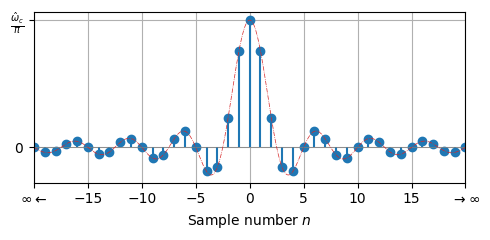

In [33]:
n = np.linspace(-20, 20, 41)
t = np.linspace(-20, 20, 501)
hn = 2*f_c*np.sinc(2*f_c*n)
ht = 2*f_c*np.sinc(2*f_c*t)

fig, ax = plt.subplots(1,1)
ax.stem(n, hn, basefmt='grey').baseline.set_linewidth(0.5)
ax.plot(t, ht, '-.C3', linewidth=0.5)
ax.set_yticks([0, 2*f_c], ["$0$", "$\\frac{\\hat{\\omega}_c}{\\pi}$"])
xticklabels = ax.get_xticklabels()
xticklabels[0] = "$\\infty \\leftarrow $"
xticklabels[-1] = "$\\rightarrow \\infty$"
ax.set_xticklabels(xticklabels)
ax.set_xlabel("Sample number $n$")
fig.savefig("hn_lowpass_ideal.svg")

### Filter frequency response



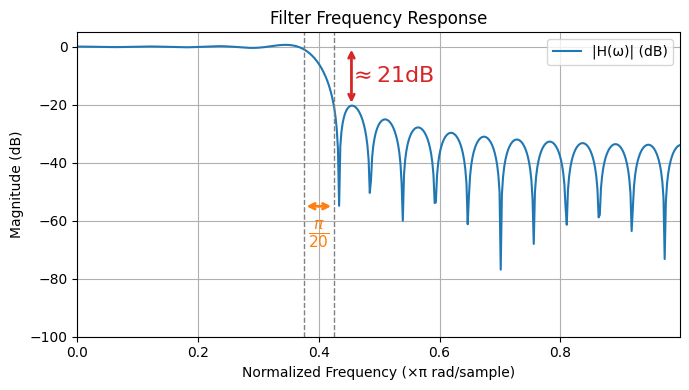

In [59]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from numpy import pi

# --- Filter design ---
M = 37  # Number of filter taps
n = np.arange(M)
w_c = 0.4 * pi  # cutoff frequency (rad)
hn = w_c / pi * np.sinc(w_c / pi * (n - (M - 1) / 2))

# --- Frequency response ---
w, Hw = sig.freqz(hn)
mag_db = 20 * np.log10(np.abs(Hw))

# --- Plot setup ---
plt.figure(figsize=(7, 4))
plt.plot(w / pi, mag_db, label='|H(ω)| (dB)')
plt.title('Filter Frequency Response')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.ylim([-100, 5])

# --- Define key points for annotations ---
wp = 0.375          # Passband edge (normalized)
ws = 0.425          # Stopband edge (normalized)
transition_bw = ws - wp

stopband_level = np.max(mag_db[w / pi > 0.45])  # Rough estimate

# --- Add double-headed arrow for transition band ---
plt.annotate(
    '', xy=(wp, -55), xytext=(ws, -55),
    arrowprops=dict(arrowstyle='<->', color='tab:orange', lw=2)
)
plt.text((wp + ws) / 2, -70, '$\\frac{\\pi}{20}$', color='tab:orange',
         ha='center', va='bottom', fontsize=16)

# --- Add double-headed arrow for stopband attenuation ---
plt.annotate(
    '', xy=(0.454, 0), xytext=(0.454, stopband_level),
    arrowprops=dict(arrowstyle='<->', color='tab:red', lw=2)
)
plt.text(0.45, stopband_level / 2, '$\\approx 21 \\text{dB}$', color='tab:red',
         va='center', fontsize=16)

# --- Add helper lines ---
plt.axvline(wp, color='gray', linestyle='--', linewidth=1)
plt.axvline(ws, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
plt.savefig("filter_properties.svg")
plt.show()

### Time shift in freq domain

/tmp/ipykernel_1948/4055571163.py:12: RuntimeWarning: invalid value encountered in divide
  Wr = np.where(w!=0, sin(w*M/2)/sin(w/2), M)


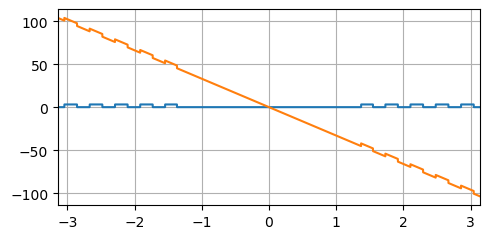

In [1]:
import numpy as np
from numpy import pi, sin, cos
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [5.00, 2.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

M = 33
w = np.linspace(-np.pi, pi, 10000, endpoint=False)
Hw = np.where(np.abs(w)<=0.4*np.pi, 1, 0)
Wr = np.where(w!=0, sin(w*M/2)/sin(w/2), M)
Hr = np.fft.fftshift(np.fft.fft(np.fft.ifft(Hw)*np.fft.ifft(Wr)))
Hr_phase = np.where(np.real(Hr)>=0, 0, np.pi)
plt.close(1); plt.figure(1)
plt.plot(w, Hr_phase)
H2 = np.exp(-1j*w*M)*Hr
H2_phase = Hr_phase - w*M
plt.plot(w, H2_phase)

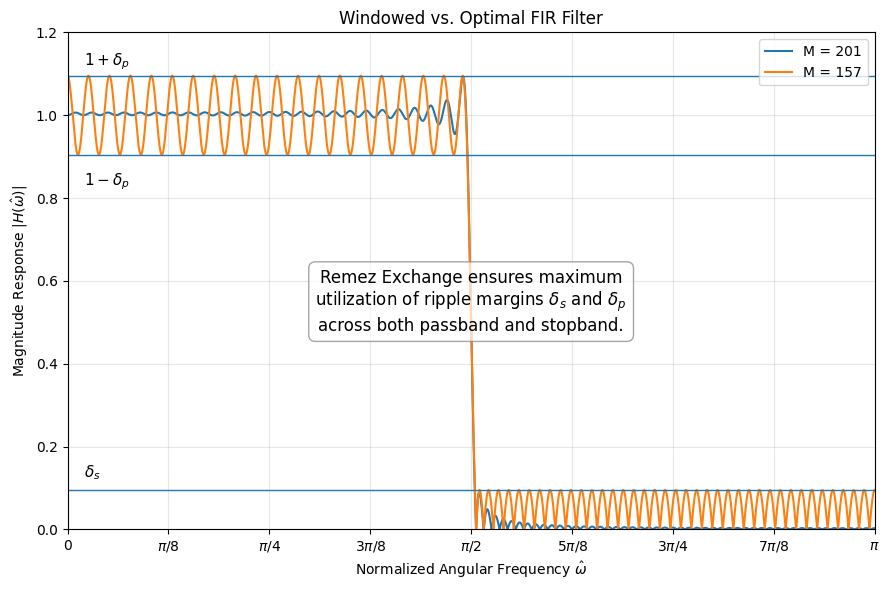

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ------- Specs (tweak to match your slide) -------
N_rect  = 201                # taps for rectangular-window design
N_remez = 157                # taps for Remez design (shorter for same-ish specs)

wc_norm = 0.50               # passband edge (normalized to Nyquist = 1.0)
TW = 0.0095               # stopband start (> wc_norm)
dp = 1/10.5                    # passband ripple (delta_p) in linear units
ds = 1/10.5                   # stopband ripple (delta_s) in linear units

# ------- Designs -------
# Rectangular-window (window method) low-pass
b_rect = signal.firwin(numtaps=N_rect, cutoff=wc_norm, window='boxcar', pass_zero='lowpass', fs=2)

# Parks–McClellan (Remez exchange)
# Weights are proportional to 1/ripple to balance passband/stopband errors.
bands   = [0, wc_norm-TW/2, wc_norm+TW/2, 1.0]
desired = [1, 0]
weights = [1/dp, 1/ds]
b_remez = signal.remez(numtaps=N_remez, bands=bands, desired=desired, weight=weights, fs=2)

# ------- Frequency responses -------
w, H_rect  = signal.freqz(b_rect, worN=4096)
_, H_remez = signal.freqz(b_remez, worN=4096)

# ------- Plot -------
plt.figure(figsize=(9, 6))
plt.plot(w, np.abs(H_rect),  label=f'M = {N_rect}')
plt.plot(w, np.abs(H_remez), label=f'M = {N_remez}')

# Axes limits and labels
plt.xlim(0, np.pi)
plt.ylim(0, 1.2)
plt.xlabel(r'Normalized Angular Frequency $\hat{\omega}$')
plt.ylabel(r'Magnitude Response $|H(\hat{\omega})|$')
plt.title(r'Windowed vs. Optimal FIR Filter')

# Transition band shading and cutoff marker
#wc = wc_norm * np.pi
#ws = ws_norm * np.pi
#plt.axvline(wc, color='k', linewidth=2)
#plt.axvspan(wc, ws, alpha=0.15, color='k')
#plt.text(wc + 0.01, 0.08, r'$\Omega_c$', fontsize=11, va='bottom')

# Passband ripple lines 1±dp
plt.axhline(1 + dp, color='C0', linewidth=1)
plt.axhline(1 - dp, color='C0', linewidth=1)
plt.text(0.02*np.pi, 1 + dp + 0.01, r'$1+\delta_p$', fontsize=11, va='bottom')
plt.text(0.02*np.pi, 1 - dp - 0.04, r'$1-\delta_p$', fontsize=11, va='top')

# Stopband bound ds
plt.axhline(ds, color='C0', linewidth=1)
plt.text(0.02*np.pi, ds + 0.02, r'$\delta_s$', fontsize=11, va='bottom')

# ------- Add textbox overlapping transition band -------
text_x = (wc_norm*np.pi) 
text_y = 0.55
plt.text(
    text_x, text_y,
    """Remez Exchange ensures maximum
utilization of ripple margins $\\delta_s$ and $\\delta_p$
across both passband and stopband.""",
    ha='center', va='center',
    fontsize=12, 
    color='black',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.4')
)

# Cosmetics
xticks = np.linspace(0, np.pi, 9)  # 0, π/8, π/4, ..., π

# Corresponding LaTeX labels
xtick_labels = [
    r'$0$', 
    r'$\pi/8$', 
    r'$\pi/4$', 
    r'$3\pi/8$', 
    r'$\pi/2$', 
    r'$5\pi/8$', 
    r'$3\pi/4$', 
    r'$7\pi/8$', 
    r'$\pi$'
]

plt.xticks(xticks, xtick_labels)

plt.legend(loc='upper right', frameon=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("remez_exchange.svg")
plt.show()

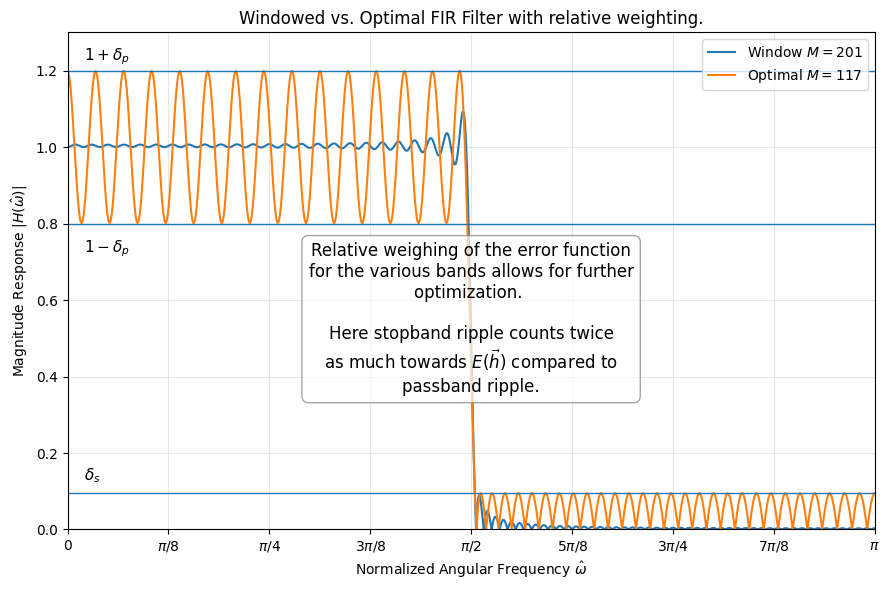

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ------- Specs (tweak to match your slide) -------
N_rect  = 201                # taps for rectangular-window design
N_remez = 117                # taps for Remez design (shorter for same-ish specs)

wc_norm = 0.50               # passband edge (normalized to Nyquist = 1.0)
TW = 0.0095               # stopband start (> wc_norm)
dp = 1/5                    # passband ripple (delta_p) in linear units
ds = 1/10.5                   # stopband ripple (delta_s) in linear units

# ------- Designs -------
# Rectangular-window (window method) low-pass
b_rect = signal.firwin(numtaps=N_rect, cutoff=wc_norm, window='boxcar', pass_zero='lowpass', fs=2)

# Parks–McClellan (Remez exchange)
# Weights are proportional to 1/ripple to balance passband/stopband errors.
bands   = [0, wc_norm-TW/2, wc_norm+TW/2, 1.0]
desired = [1, 0]
weights = [1/dp, 1/ds]
b_remez = signal.remez(numtaps=N_remez, bands=bands, desired=desired, weight=weights, fs=2)

# ------- Frequency responses -------
w, H_rect  = signal.freqz(b_rect, worN=4096)
_, H_remez = signal.freqz(b_remez, worN=4096)

# ------- Plot -------
plt.figure(figsize=(9, 6))
plt.plot(w, np.abs(H_rect),  label=f'Window $M = {N_rect}$')
plt.plot(w, np.abs(H_remez), label=f'Optimal $M = {N_remez}$')

# Axes limits and labels
plt.xlim(0, np.pi)
plt.ylim(0, 1.3)
plt.xlabel(r'Normalized Angular Frequency $\hat{\omega}$')
plt.ylabel(r'Magnitude Response $|H(\hat{\omega})|$')
plt.title(r'Windowed vs. Optimal FIR Filter with relative weighting.' )

# Transition band shading and cutoff marker
#wc = wc_norm * np.pi
#ws = ws_norm * np.pi
#plt.axvline(wc, color='k', linewidth=2)
#plt.axvspan(wc, ws, alpha=0.15, color='k')
#plt.text(wc + 0.01, 0.08, r'$\Omega_c$', fontsize=11, va='bottom')

# Passband ripple lines 1±dp
plt.axhline(1 + dp, color='C0', linewidth=1)
plt.axhline(1 - dp, color='C0', linewidth=1)
plt.text(0.02*np.pi, 1 + dp + 0.01, r'$1+\delta_p$', fontsize=11, va='bottom')
plt.text(0.02*np.pi, 1 - dp - 0.04, r'$1-\delta_p$', fontsize=11, va='top')

# Stopband bound ds
plt.axhline(ds, color='C0', linewidth=1)
plt.text(0.02*np.pi, ds + 0.02, r'$\delta_s$', fontsize=11, va='bottom')

# ------- Add textbox overlapping transition band -------
text_x = (wc_norm*np.pi) 
text_y = 0.55
plt.text(
    text_x, text_y,
    """Relative weighing of the error function
for the various bands allows for further
optimization. 

Here stopband ripple counts twice
as much towards $E(\\vec{h})$ compared to
passband ripple.""",
    ha='center', va='center',
    fontsize=12, 
    color='black',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.4')
)


# Cosmetics
xticks = np.linspace(0, np.pi, 9)  # 0, π/8, π/4, ..., π

# Corresponding LaTeX labels
xtick_labels = [
    r'$0$', 
    r'$\pi/8$', 
    r'$\pi/4$', 
    r'$3\pi/8$', 
    r'$\pi/2$', 
    r'$5\pi/8$', 
    r'$3\pi/4$', 
    r'$7\pi/8$', 
    r'$\pi$'
]

plt.xticks(xticks, xtick_labels)
plt.legend(loc='upper right', frameon=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("remez_relative_weights.svg")
plt.show()

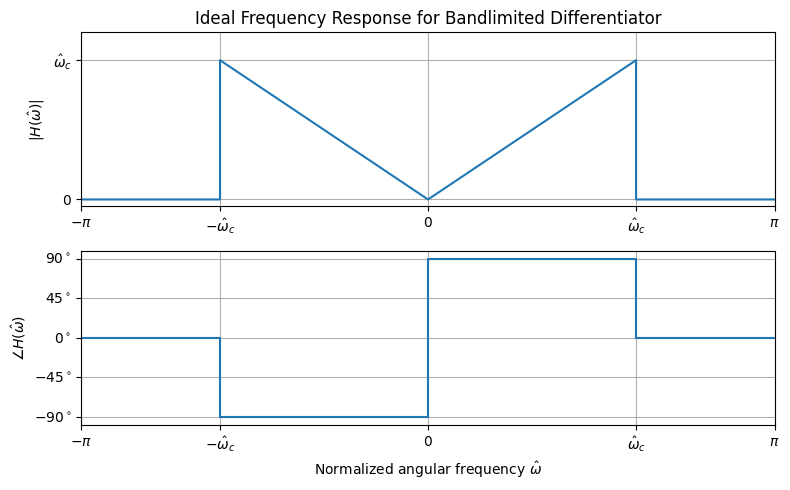

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
plt.rcParams["figure.figsize"] = [8.00, 5.00]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0
w_c = 0.6*pi
# Cosmetics
xticks = [-pi, -w_c, 0, w_c, pi]

# Corresponding LaTeX labels
xtick_labels = [
    r'$-\pi$',
    r'$-\hat{\omega}_c$',
    r'$0$', 
    r'$\hat{\omega}_c$',
    r'$\pi$'
]



w = [-pi, -w_c, -w_c, 0,0, w_c, w_c, pi]
Mag = [0, 0, w_c, 0,0 , w_c, 0, 0]
Phase = np.rad2deg([0, 0, -pi/2, -pi/2, pi/2, pi/2, 0, 0])

plt.subplot(2,1,1)
plt.plot(w, Mag)
plt.title("Ideal Frequency Response for Bandlimited Differentiator")
plt.xticks(xticks, xtick_labels);
plt.yticks([0, w_c], labels=["$0$", "$\\hat{\\omega}_c$"])
plt.ylabel("$|H(\\hat{\\omega})|$")
plt.ylim(ymax=w_c*1.2)
plt.subplot(2,1,2)
plt.plot(w, Phase)
plt.xticks(xticks, xtick_labels);
plt.grid(True)
plt.yticks([-90, -45, 0, 45, 90], labels=[f"${x}^\\circ$" for x in [-90, -45, 0, 45, 90]])
plt.xlabel("Normalized angular frequency $\\hat{\\omega}$")
plt.ylabel("$\\angle H(\\hat{\\omega})$")
plt.savefig("bandlimited_differentiator.svg")

# System Diagrams

In [1]:
%load_ext jupyter_tikz

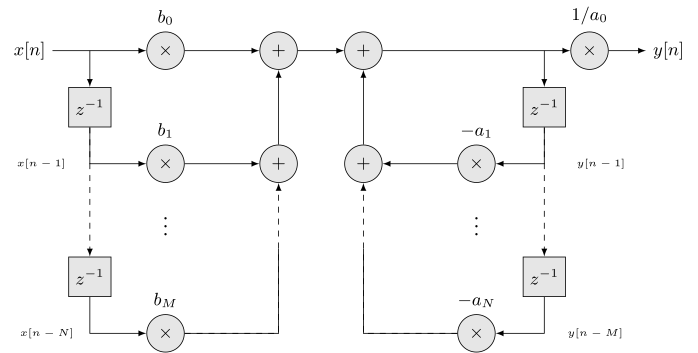

In [24]:
%%tikz -p=\include{prefix.tex} -sc=2 -S df1.svg
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[sum, right of=in, xshift=10mm, label={$b_0$}](b0){$\times$};
	\node[sum, right of=b0, xshift=10mm](s0){$+$};
	\node[sum, right of=s0, xshift=5mm](s0r){$+$};
    \node[mul, right of=s0r, xshift=30mm, label={$1/a_0$}](ma0){$\times$}; 
	\node[output, right of=ma0, xshift=-15mm] (out){};
	\node at ($(b0.west)-(1, 0)$) (c0){};
	\node at ($(ma0)-(.8, 0)$) (c0r){};

	% blocks 2nd level
	\node[block, below of=c0, minimum width=5mm, minimum height=7mm, yshift=15mm](d0){$z^{-1}$};
	\node[sum, below of=b0, yshift=-10mm, label={$b_1$}](b1){$\times$};
	\node[sum, below of=s0, yshift=-10mm](s1){$+$};
	\node[sum, below of=s0r, yshift=-10mm](s1r){$+$};
	\node[sum, right of=s1r, xshift=10mm, label={$- a_1$}](a1){$\times$};
	\node[block, below of=c0r, minimum width=5mm, minimum height=7mm, yshift=15mm](d0r){$z^{-1}$};
	
	% blocks M-th level
	\node[block, below of=d0, minimum width=5mm, minimum height=7mm, yshift=-5mm](d1){$z^{-1}$};
	\node[sum, below of=b1, yshift=-20mm, label={$b_M$}](b2){$\times$};
	\node[block, below of=d0r, minimum width=5mm, minimum height=7mm, yshift=-5mm](d1r){$z^{-1}$};
	\node[sum, below of=a1, yshift=-20mm, label={$-a_N$}](a2){$\times$};
	
	%lines
	\draw[->] (in) node[left]{$x[n]$}--(b0);
	\draw[->] (b0)--(s0);
	\draw[->] (s0)--(s0r);
	\draw[->] (s0r)--(ma0);
	\draw[->] (ma0)--(out) node[right]{$y[n]$};
	
	\draw[->] (c0.center)--(d0);
	\draw[->] (d0) |- (b1);
	\draw[->] (b1) -- (s1);
	\draw[->] (s1) -- (s0);
	\draw[->] (c0r.center) -- (d0r);
	\draw[->] (d0r) |- (a1);
	\draw[->] (a1) -- (s1r);
	\draw[->] (s1r) -- (s0r);
	
	\draw[->, dashed] (d0)--(d1);
	\draw[->] (d1) |- (b2);
	\draw[->, dashed] (b2) -| (s1);
	\draw (b2) -| ($(s1)-(0,1.5)$);
	
	\draw[->, dashed] (d0r)--(d1r);
	\draw[->] (d1r) |- (a2);
	\draw[->, dashed] (a2) -| (s1r);
	\draw (a2) -| ($(s1r)-(0,1.5)$);
	
	% delayed signals
	\node[below of=in, yshift=5mm, xshift=-2mm] {\tiny $x[n-1]$};
	\node[below of=in, yshift=-25mm, xshift=-1mm] {\tiny $x[n-N]$};
	\node[below of=ma0, yshift=5mm, xshift=2mm] {\tiny $y[n-1]$};
	\node[below of=ma0, yshift=-25mm, xshift=1mm] {\tiny $y[n-M]$};
	
	\node[right of=s0, yshift=-3mm, xshift=-18mm] {};
	
	\node[below of=b1, yshift=15mm]{\large $\vdots$};
	\node[below of=a1, yshift=15mm]{\large $\vdots$};

\end{tikzpicture}

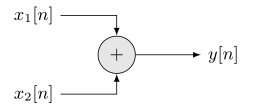

In [4]:
%%tikz -p=\include{prefix.tex} -sc=2 -S summation.svg
\begin{tikzpicture}[auto, node distance=25mm]

	% blocks 1st level
	\node[input] (in){};
    \node[sum, right of=in, xshift=0mm, yshift=-7mm](s0){$+$};
    \node[input, below of=in, yshift=11mm](in2){};
	\node[output, right of=s0, xshift=-10mm] (out){};
	
	% lines
	\draw[->] (in) node[left]{$x_1[n]$}-|(s0) node[above]{};
 	\draw[->] (in2) node[left]{$x_2[n]$}-|(s0) node[below]{};
   	\draw[->] (s0) node[right]{}--(out) node[right]{$y[n]$};
	
\end{tikzpicture}

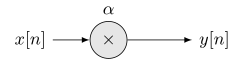

In [5]:
%%tikz -p=\include{prefix.tex}  -sc=2 -S multiply.svg
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
    \node[mul, right of=in, xshift=0mm, label={$\alpha$}](m0){$\times$};
	\node[output, right of=m0, xshift=-10mm] (out){};
	
	% lines
	\draw[->] (in) node[left]{$x[n]$}--(m0) node[left]{};
   	\draw[->] (m0) node[right]{}--(out) node[right]{$y[n]$};
\end{tikzpicture}

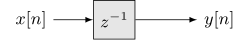

In [6]:
%%tikz -p=\include{prefix.tex} -sc=2 -S delay.svg
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[block, right of=in, minimum width=5mm, minimum height=7mm, xshift=-14mm](d1){$z^{-1}$};
	\node[output, right of=d1, xshift=-10mm] (out){};
	
	% lines
	\draw[->] (in) node[left]{$x[n]$}--(d1) node[left]{};
   	\draw[->] (d1) node[right]{}--(out) node[right]{$y[n]$};
\end{tikzpicture}

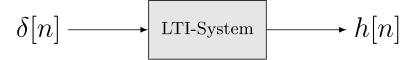

In [11]:
%%tikz -p=\include{prefix.tex} -sc=2 -S impulse_response.svg
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[block, right of=in](sys1){$\text{LTI-System}$};
	\node[output, right of=sys1] (out){};
	
	% lines
	\draw[->] (in) node[left]{\Large $\delta[n]$}--(sys1) node[left]{};
   	\draw[->] (sys1) node[right]{}--(out) node[right]{\Large $h[n]$};
\end{tikzpicture}

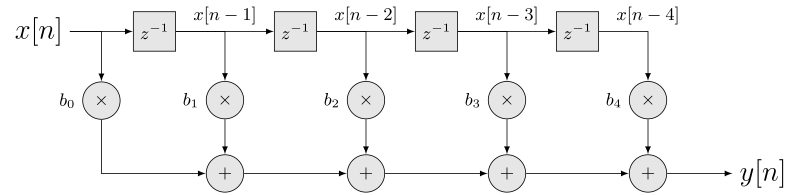

In [76]:
%%tikz -p=\include{prefix.tex} -sc=2 -S tapped_delay_line.svg
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[block, right of=in, minimum width=5mm, minimum height=7mm, xshift=-10mm](d1){$z^{-1}$};
    \node[block, right of=d1, minimum width=5mm, minimum height=7mm](d2){$z^{-1}$};
    \node[block, right of=d2, minimum width=5mm, minimum height=7mm](d3){$z^{-1}$};
    \node[block, right of=d3, minimum width=5mm, minimum height=7mm](d4){$z^{-1}$};
	
	% lines
	\draw[->] (in) node[left]{\Large $x[n]$}--(d1) node[midway](t0){};
	\draw[->] (d1) --(d2) node[midway](t1){$x[n-1]$};
	\draw[->] (d2) --(d3) node[midway](t2){$x[n-2]$};
    \draw[->] (d3) --(d4) node[midway](t3){$x[n-3]$};
   	%\draw[->] (d4) node[left]{}--(out) node[right]{\Large $y[n]$};

    % coeffs
    \node[mul, below of=t0, yshift=-3.5mm, label={left:$b_0$}](b0){$\times$};
    \node[mul, below of=t1, yshift=-5mm, label={left:$b_1$}](b1){$\times$}; 
    \node[mul, below of=t2, yshift=-5mm, label={left:$b_2$}](b2){$\times$};
    \node[mul, below of=t3, yshift=-5mm, label={left:$b_3$}](b3){$\times$}; 
    \node[mul, below of=t3, yshift=-5mm, xshift=25mm, label={left:$b_4$}](b4){$\times$};

    \node[sum, below of=b1, yshift=-3mm](s1){$+$};
    \node[sum, below of=b2, yshift=-3mm](s2){$+$}; 
    \node[sum, below of=b3, yshift=-3mm](s3){$+$};
    \node[sum, below of=b4, yshift=-3mm](s4){$+$};   
    \node[output, right of=s4, xshift=-10mm] (out){};

	% lines
	\draw[->] (in) -|(b0) ;
    \draw[->] (d1) -|(b1) ;
    \draw[->] (d2) -|(b2) ;
    \draw[->] (d3) -|(b3) ;
    \draw[->] (d4) -|(b4) node[midway, above]{$x[n-4]$};

    \draw[->] (b0) |- (s1);
    \draw[->] (b1) --(s1) ;
    \draw[->] (b2) --(s2) ;
    \draw[->] (b3) --(s3) ;
    \draw[->] (b4) --(s4) ;
    \draw[->] (s1) --(s2) ;
    \draw[->] (s2) --(s3) ;
    \draw[->] (s3) --(s4) ;
    \draw[->] (s4) -- (out) node[right]{\Large $y[n]$};

    
\end{tikzpicture}

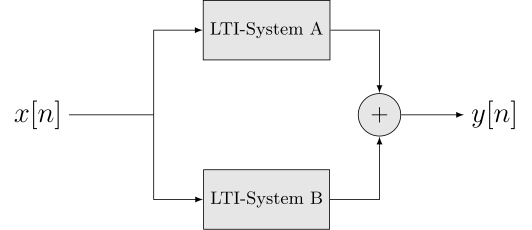

In [24]:
%%tikz -p=\include{prefix.tex} -sc=2 -S parallell.svg
\begin{tikzpicture}[auto, node distance=15mm]
	% blocks 1st level
	\node[input] (in){};
    \node[right of=in](branch){};
	\node[block, above of=branch, xshift=20mm](sys1){$\text{LTI-System A}$};
	\node[block, below of=branch, xshift=20mm](sys2){$\text{LTI-System B}$};
    \node[sum, right of=branch, xshift=30mm](sum1){\large $+$};
	\node[output, right of=sum1] (out){};
	
	% lines
	\draw[-] (in) node[left]{\Large $x[n]$}--(branch.center);
    \draw[->] (branch.center)|-(sys1) node[left]{};
    \draw[->] (branch.center)|-(sys2) node[left]{};
   	\draw[->] (sys1) node[right]{}-|(sum1) ;
   	\draw[->] (sys2) node[right]{}-|(sum1) ;
    \draw[->] (sum1)--(out) node[right]{\Large $y[n]$};    
\end{tikzpicture}

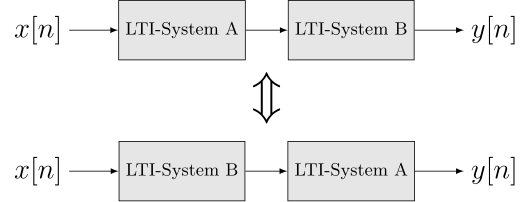

In [42]:
%%tikz -p=\include{prefix.tex} -sc=2 -S cascade.svg
\begin{tikzpicture}[auto, node distance=20mm]
	% Cascade configuration 1
	\node[input] (in1){};
	\node[block, right of=in1](sys1){$\text{LTI-System A}$};
    \node[block, right of=sys1, xshift=10mm](sys2){$\text{LTI-System B}$};
	\node[output, right of=sys2] (out1){};

	% lines
	\draw[->] (in1) node[left]{\Large $x[n]$}--(sys1) node[left]{};
    \draw[->] (sys1) --(sys2){};
   	\draw[->] (sys2)--(out1) node[right]{\Large $y[n]$};

        
	% Cascade configuration 2
	\node[input, below of=in1, yshift=-5mm] (in2){};
	\node[block, right of=in2](sys3){$\text{LTI-System B}$};
    \node[block, right of=sys3, xshift=10mm](sys4){$\text{LTI-System A}$};
	\node[output, right of=sys4] (out2){};

	% lines
	\draw[->] (in2) node[left]{\Large $x[n]$}--(sys3) node[left]{};
    \draw[->] (sys3) --(sys4){};
   	\draw[->] (sys4)--(out2) node[right]{\Large $y[n]$};

	\node[below of=sys1, xshift=15mm, yshift=8mm]{\Huge $\Updownarrow$};
\end{tikzpicture}

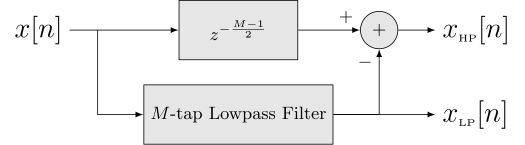

In [2]:
%%tikz -p=\include{prefix.tex} -sc=2 -S band_splitter.svg
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
    \node[right of=in, xshift=-20mm] (branch1){};
	\node[block, right of=branch1](sys1){$z^{-\frac{M-1}{2}}$};
    \node[block, below of=sys1, yshift=10mm](d1){$M\text{-tap Lowpass Filter}$};
    \node[sum, right of=sys1, xshift=15mm](s1){$+$};
	\node[output, right of=sys1, xshift=10mm] (out1){};
    \node[output, below of=out1, yshift=10mm] (out2){};
	
	% lines
	\draw[->] (in) node[left]{\Large $x[n]$}--(sys1) node[left]{};
    \draw[->] (branch1.center) |- (d1){};
    \draw[->] (sys1.east) -- (s1.west) node[above left]{$+$};
    \draw[->] (d1) -| (s1.south) node[below left]{$-$};
   	\draw[->] (s1) node[right]{}--(out1) node[right]{\Large $x_{\text{\tiny{HP}}}[n]$};
    \draw[->] (d1) node[right]{}--(out2) node[right]{\Large $x_{\text{\tiny{LP}}}[n]$};
\end{tikzpicture}